# Data Exploration and first metrics computation

In [24]:
import os
import Tracab as tracab
import Tracking_Visuals as vis
import numpy as np
import matplotlib.pyplot as plt

current_dir = os.path.dirname(os.getcwd())
fpath = os.path.join(current_dir, 'TrackingSample') # path to directory of Tracab data

# config
LEAGUE = 'DSL'

We read the data:
* frames is a list of the individual match snapshots (positions, velocities)
* match contains some metadata (pitch dimensions, etc)
* team1_players is a dictionary of the home team players (containing arrays of their positions/velocities over the match)
* team0_players is a dictionary of the away team players (containing arrays of their positions/velocities over the match)

In [2]:
# data
fname = '984628'

# read frames, match meta data, and data for individual players
frames_tb, match_tb, team1_players, team0_players = tracab.read_tracab_match_data(LEAGUE,fpath,fname,verbose=True)

Reading match metadata
Reading match tracking data
Timestamping frames
Measuring velocities
home goalkeeper(s):  [1]
away goalkeeper(s):  [73]
0 67615
67616 139808


In [3]:
print('there are {} frames'.format(len(frames_tb)))

there are 139810 frames


### Example: plot the pitch, players and ball in a single frame. 

the co-ordinate system has the origin in the center of the pitch. x-axis is left-right, y-axis is up-down. Distances are in cm by default.


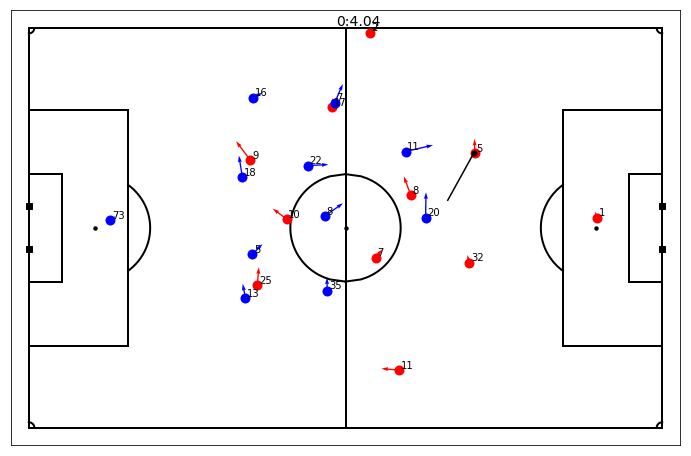

In [4]:
k_frame = 101

fig,ax = vis.plot_frame(frames_tb[k_frame],
                        match_tb,
                        include_player_velocities=True,
                        include_ball_velocities=True)

### Example: get all frames between the 19th and 21st minute in the first half

In [5]:
tstart = (1,19)
tend = (1,21)
frames_in_segment = vis.get_frames_between_timestamps(frames_tb, match_tb, tstart, tend)

### Example: get the x,y,z positions and velocities of the ball throughout the first half

In [6]:
frames_in_first_half = frames_tb[0:match_tb.period_attributes[1]['iEnd']]
ball_positions_xyz = []
ball_velocities_xyz = []
timestamps = []
for frame in frames_in_first_half:
    if frame.ball: # sometimes the ball data isn't in the frame (for whatever reason)
        ball_positions_xyz.append( [frame.ball_pos_x, frame.ball_pos_y, frame.ball_pos_z] )
        ball_velocities_xyz.append( [frame.ball_vx, frame.ball_vy, frame.ball_vz] )
        timestamps.append( frame.timestamp )        
        
# convert from list into array to make it easier to slice
ball_positions_xyz = np.array( ball_positions_xyz ) / 100. # convert to m
ball_velocities_xyz = np.array( ball_velocities_xyz ) # already in m/s

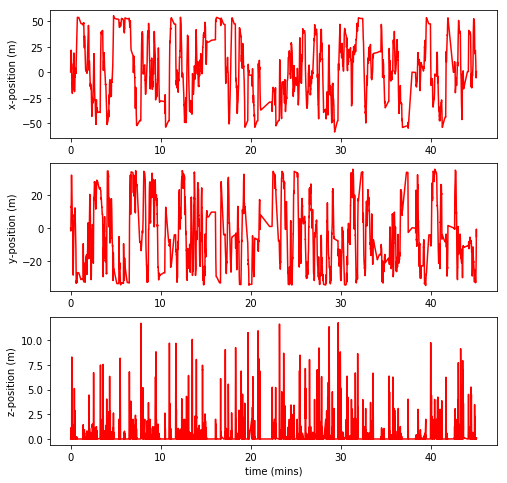

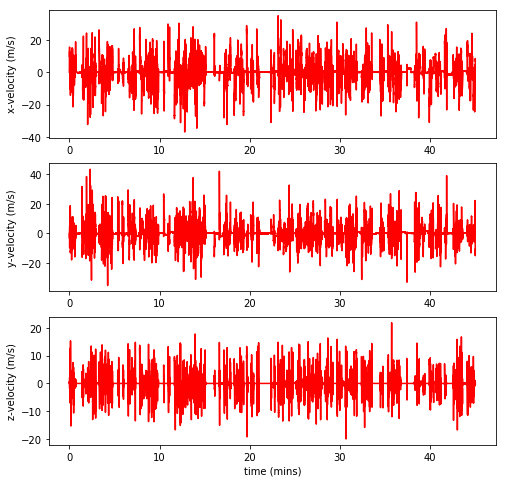

In [7]:
# plot positions and velocities of the ball in each direction
fig,axes = plt.subplots(3,1,figsize=(8,8))
fig2,axes2 = plt.subplots(3,1,figsize=(8,8))
for i,l in zip([0,1,2],['x','y','z']):
    axes[i].plot(timestamps,ball_positions_xyz[:,i],'r')
    axes2[i].plot(timestamps,ball_velocities_xyz[:,i],'r')
    axes[i].set_ylabel(l + '-position (m)')
    axes2[i].set_ylabel(l + '-velocity (m/s)')
# add x-axis labels
axes[2].set_xlabel('time (mins)')
axes2[2].set_xlabel('time (mins)')
plt.show()

### Example: make a plot of a player 2's position (home team) over the first half

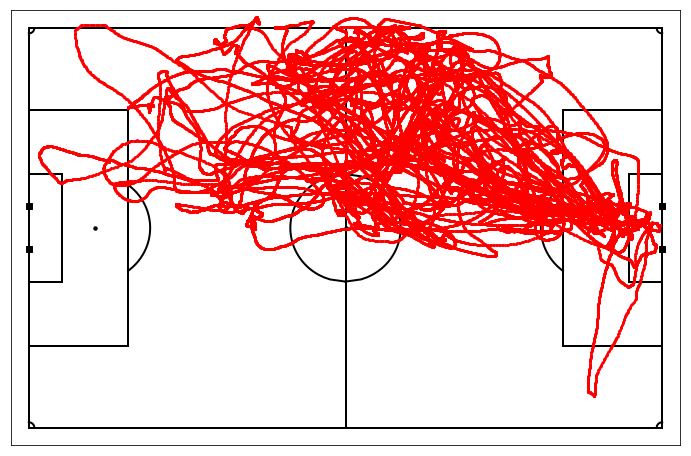

In [9]:
# plot pitch
fig, ax = vis.plot_pitch(match_tb) 

px = np.array([f.pos_x for f in team1_players[2].frame_targets])
py = np.array([f.pos_y for f in team1_players[2].frame_targets])
t = np.array(team1_players[2].frame_timestamps)
flast = vis.find_framenum_at_timestamp(frames_tb,match_tb, 2, 0) # first frame of second half
ax.plot(px[0:flast], py[0:flast], 'r.', markeredgewidth=0.01)

plt.show()

## Make a possesion plot

In [22]:
# get posessions
pos_lst = tracab.get_tracab_posessions(frames_tb, match_tb, min_pos_length=5)
print(len(pos_lst))

197


In [23]:
# plot posessions
tracab.make_posession_plot(pos_lst)

NameError: name 'plt' is not defined